<img src="https://i.ibb.co/DtHQ3FG/802x265-Logo-GT.png" width="500">

## Grupo Turing
---

# Divisão em base de treino e teste & Validação Cruzada: 
---

- **Resumo:** O objetivo desse notebook é explicitar qual a importância de ter dados para treinar e testar seu modelo de machine learning e ainda abordar sobre cross-validation e como ela pode a ajudar a contornar uma limitação de dados **deixar textinho melhor**

- **Requisitos:** Entender o básico das bibliotecas básicas (principalmente `pandas`), ter visto alguma vez `sklearn`

- **Links:**
    - [deeplizard](https://www.youtube.com/watch?v=Zi-0rlM4RDs)
    - [StatQuest](https://www.youtube.com/watch?v=fSytzGwwBVw)
    - [Machine Learning Mastery](https://machinelearningmastery.com/train-test-split-for-evaluating-machine-learning-algorithms/#:~:text=The%20reason%20is%20that%20when,effectively%20evaluate%20the%20model%20performance.)
    - [towards data science](https://towardsdatascience.com/train-test-split-and-cross-validation-in-python-80b61beca4b6)
    - [Medium](https://medium.com/@contactsunny/how-to-split-your-dataset-to-train-and-test-datasets-using-scikit-learn-e7cf6eb5e0d)
    - [Scikit Documentation](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html)



# Sets de Treino, Teste e Validação
---

Com certeza um dos maiores paradigmas dentro de modelos supervisionados de machine learning é a necessidade de você separar uma parte do seus dados para treino e outra ficar exclusivamente para teste, mas qual o motivo de fazer isso ?

É natural termos dados de treino, uma vez que seu modelo vai continuamente analisar essa base para tentar aprender como as features influenciam o resultado, porém precisamos ter uma parte dos dados para conferirmos se nosso modelo apresenta a propriedade de generalização (e não só decorou a base de treino -> *overfitting*), para isso separamos uma parte dos dados para teste, que é basicamente um conjunto de dados com o mesmo formato do treino, inclusive rotulado, só que nunca vistos antes pelo modelo.

<img src='https://drive.google.com/uc?id=17kInj35LWTjNtDG_R4HNB1cv2skXv9h-'>

Vou dar um exemplo de como essa divisão pode ser feita usando o iris dataset, disponível no `sklearn`:

In [1]:
import pandas as pd
from sklearn.datasets import load_iris

# Primeira parte apenas para carregarmos nossos dados
iris = load_iris()
df = pd.DataFrame(iris.data, columns=iris.feature_names)
df['target'] = pd.Series(iris.target)

print(df.shape)

(150, 5)


Legal com isso podemos ver que nosso dataset tem 150 observações, 4 features e 1 coluna de Target, mas agora a dúvida é: Qual deve ser a porcentagem de divisão dos meus dados ?

Para essa pergunta temos a clássica resposta do depende, depende da quantidade de dados que você tem basicamente, pois você precisa ter tanto dados suficientes para treinar seu modelo quanto uma quantidade razoável para provar a eficiencia do seu modelo, mas como um bom norte geralmente se usa entre 15% a 25% dos dados para teste.

Podemos fazer essa separação usando também o `sklearn`:

In [2]:
from sklearn.model_selection import train_test_split

# random_state serve para controlar a semente de como seus dados vão ser embaralhados
X_treino, X_teste, y_treino, y_teste = train_test_split(df[df.columns[:-1]], df['target'], test_size=0.2, random_state=42)
print("Treino:", X_treino.shape, "\nTeste:", X_teste.shape)

Treino: (120, 4) 
Teste: (30, 4)


Muito fácil, não ?

Só passando as features e o target essa função do `sklearn` já divide seus dados em X e y para treino e teste segundo a proporção específicada em *test_size* que controla a porcentagem de dados separados para teste, no meu caso 20% deles (30 observações).

Com ambos os dados de treino e teste (limpos) em mãos podemos fittar nosso modelo e ter nossas métricas de modo mais fiel representadas pelos dados de teste.

In [3]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier()
knn.fit(X_treino, y_treino)
predição = knn.predict(X_teste)

In [4]:
from sklearn import metrics

print(  "Acurácia:", metrics.accuracy_score(y_teste, predição),
      "\nPrecisão:", metrics.precision_score(y_teste, predição, average='micro'),
      "\n  Recall:", metrics.recall_score(y_teste, predição, average='micro'),
      "\nF1-score:", metrics.f1_score(y_teste, predição, average='micro'))

Acurácia: 1.0 
Precisão: 1.0 
  Recall: 1.0 
F1-score: 1.0


Observação:

Em alguns casos, fora os dados de treino e teste temos também os dados de validação, esses dados geralmente são o objetivo do seu problema, e eles não estão rotulados.

# Validação Cruzada (Cross Validation)
---

Uma outra abordagem é a Validação Cruzada, nesse método seu dataset é dividido em K-folds (divisões) e o algoritmo de machine learning é então treinado em k-1 dessas divisões e testado na fold restante e isso é feito iterativamente até todas as divisões tenham sido separadas para teste (holdout) pelo menos uma vez.

Essa abordagem é bem efetiva, pois tende a ter um resultado mais frio sobre o modelo que está se utilizando, uma vez que você vai ter uma estimativa mais geral do modelo.

Esse método é muito bom para comparar modelos de Machine Learning que você quer usar no seu projeto e também para ajudar a achar os parâmetros de ajuste, parâmetros que não são treinados, mas sim adivinhados, como o valor de k dentro de um KNN.

<img src="https://drive.google.com/uc?id=1mFMMRvfuhmljD-vsu4NZ-bBaCzc6_SJ4" width=500>


In [5]:
from sklearn.model_selection import cross_val_score

K = [i for i in range(1, 21)]
scores = []

for k in K:
    knn = KNeighborsClassifier(n_neighbors=k)
    score = cross_val_score(knn, df[df.columns[:-1]], df['target'], cv=5, scoring='accuracy').mean()
    scores.append(score)

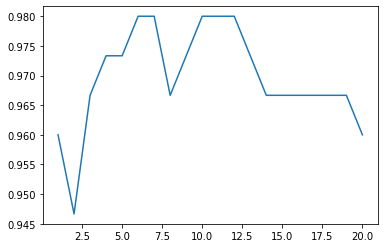

In [6]:
import seaborn as sns

sns.lineplot(x=K, y=scores)

Observação:

O valor de K é definido arbitrariamente, no exemplo anterior temos um 5-fold, por termos 5 divisões, em casos extremos temos o chamado leave-one-out Cross Validation, que consiste em usar como teste apenas 1 das amostras do dataset, porém na prática escolhemos K entre 5 e 10.

<img src='https://drive.google.com/uc?id=1qk7ZGsyk6DiZQ91WG_WBFr6W6w6PNkNK' width=500>

---
**Grupo Turing**  
Grupo de Extensão da Universidade de São Paulo (USP)

[Email](mailto:turing.usp@gmail.com)   
[Facebook](https://www.facebook.com/grupoturing.usp)  
[Medium](https://www.medium.com/turing-talks)  
[LinkedIn](https://www.linkedin.com/company/grupo-turing)